# Lista 3 - Física Computacional
Aluna: Ylana Karolina Santos Lopes

In [100]:
from numpy import exp, pi, cos, sin, arange, linspace, loadtxt, empty, sqrt
from pylab import plot, xlabel, ylabel, imshow, xlim, ylim, gray, show
from gaussxw import gaussxw

In [259]:
# -----------> constantes <----------------------
ro = 6.022e28 # me-3 densidade
theta_d = 428 # K temperatura de debye
v = 1e-3 #me3 volume
kb = 1.380649e-23 #cte de boltzmann
h = 6.62607015e-34 # cte de planck
h_cort = h/(2*pi)
c = 299792458.0 # velocidade da luz
G = 6.674e-11 #cte de gravitação
sigma = 5.67037442e-8 # cte de stefan-boltzmann


#### Problema 1: Capacidade térmica de um Sólido

In [271]:
#a) 

def cv(T):
    def f(x):
        return (x**4*exp(x))/(exp(x)-1)**2

    a = 0.0
    b = theta_d/T
    N = 50
    y,w = gaussxw(N)
    x = ((b-a)/2)*y+(b+a)/2
    wl = ((b-a)/2)*w
    integ = 0.0

    for k in range(N):
        integ+=wl[k]*f(x[k])
        
        
    return (9*v*ro*kb*(T/theta_d)**3)*integ

    
resul = cv(100)
    
print("Para um número de fatias 50 o valor estimado da capacidade térmica é",resul,"J/K.")



Para um número de fatias 50 o valor estimado da capacidade térmica é 1153.2637611460727 J/K.


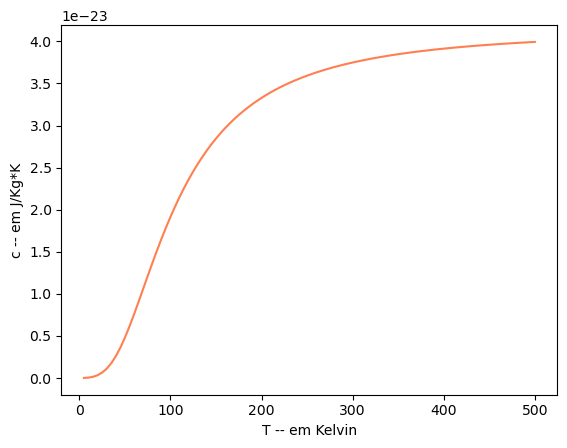

In [277]:
#b)
## calcula o calor específico -> c = cap. Termica/m

m = ro*v
c = []
T = linspace(5, 500, 100)

for l in range(0,100):
    c.append(cv(T[l])/m)

ylabel("c -- em J/Kg*K")
xlabel("T -- em Kelvin")
plot(T, c, color = 'coral')

#### Problema 2: A constante de Stefan–Boltzmann

##### a) 
Tendo $I(w)$, nós integramos em $x$ após realizar a mudança de variável $x = \frac{\hbar w}{k_b T}$, em que consequentemente $w = \frac{x k_b T}{\hbar}$, logo $dw = \frac{K_b T}{\hbar} dx$ .

$$W = \frac{h}{4\pi^2 c^2} \int_{0}^{\infty} \frac{x^3 K_b^3 T^3}{\hbar^3 (e^x - 1)} \frac{K_b T}{\hbar}\,dx $$

Tiramos as constantes, e simplificamos o que for possível chegando a equação dada na questão.

$$W = \frac{K_b^4 T^4}{4\pi^2 c^2 \hbar^3} \int_{0}^{\infty} \frac{x^3}{e^x - 1}\,dx$$



In [263]:
#b) 
def f(z):
    return (z/(1-z))**3/((exp(z/(1-z))-1)*(1-z)**2)

a = 0.0
b = 1.0
N = 50
y,w = gaussxw(N)
z = ((b-a)/2)*y+(b+a)/2
wl = ((b-a)/2)*w
integ = 0.0

for k in range(N):
    integ +=wl[k]*f(z[k])

    
print(integ)

6.493939400514872


C:\Users\ylana\AppData\Local\Temp\ipykernel_31056\1593897713.py:6: RuntimeWarning: overflow encountered in exp
  return (z/(1-z))**3/((exp(z/(1-z))-1)*(1-z)**2)


Escolhi a quadratura gaussiana por ser o método mais preciso e evitar divisões por 0 que ocorreria com outros métodos nesse exemplo.

In [267]:
#c)
cte_SB = integ*kb**4/(4*pi**2*c**2*h_cort**3)
print("Valor estimado: ",cte_SB)
print("Valor da definição:", sigma, "kg s-3 K-4")

e = ((sigma-cte_SB)/sigma)*100
print("%.10f"%e,"% de erro, o que é bastante satisfatório")


#É possível ver que se trata de um resultado satisfatório, concordando em 8 casas decimais.

Valor estimado:  5.670374417654656e-08
Valor da definição: 5.67037442e-08 kg s-3 K-4
0.0000000414 % de erro, o que é bastante satisfatório


#### Problema 3: Atração gravitacional de uma folha uniforme

##### a) 
Partindo de $ F_g = G\frac{mM}{r^2}$, e que $M = \sigma dx dy$, e que só precisamos da componente z das forças, temos:

$$ dF_z = G\frac{\sigma dx dy}{r^2}cos\theta $$

Em que $r^2 = x^2 + y^2 + z^2$ pelo arranjo do problema, e $cos\theta = \frac{z}{x^2 + y^2 + z^2}$. Então substituindo e montando a integral de L/2 a -L/2 (já que consideramos o z como zero), temos:

$$ dF_z = G\frac{\sigma dx dy}{x^2 + y^2 + z^2}\frac{z}{\sqrt(x^2 + y^2 + z^2)}, $$

$$  F_z = \iint_A G\frac{\sigma dx dy}{x^2 + y^2 + z^2}\frac{z}{\sqrt(x^2 + y^2 + z^2)} \,\, .$$

Juntando os denominadores, e tirando as constantes encontramos a expressão dada na questão:

$$  F_z = G\sigma z \iint_A \frac{dx dy}{\sqrt((x^2 + y^2 + z^2)^3)} \,\,.$$


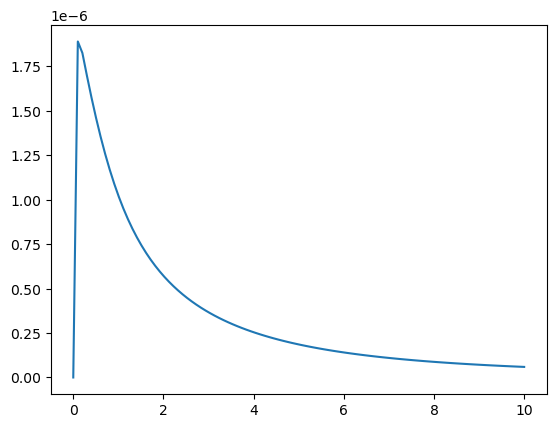

In [256]:
#b)
M = 1000 #kg
def f(x, y, z):
    return 1/(x**2 + y**2 + z**2)**1.5

def F(z):
    a = -5
    b = 5
    N = 100
    y,w = gaussxw(N)
    xp = ((b-a)/2)*y+(b+a)/2
    wl = ((b-a)/2)*w
    integ2 = 0.0

    for k in range(N):
        for j in range(N):
            integ2+=wl[k]*wl[j]*f(xp[k], y[j], z)
    
    return integ2*G*z*M

z = linspace(0,10,100)

plot(z, F(z))

#### c) 
Esse artefato vem da forma que a quadratura gaussiana calcula o resultado, evitando divisões por 0. 